<a href="https://colab.research.google.com/github/frikel12/Machine-Learning-and-Deep-Learningproject/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>Ensemble Learning (Apprentissage ensembliste)
</bold>


<h2>2	Implémentation</h2>
L’implémentation sera réalisée sous Python en utilisant une partie de la base de données d'images avec deux classes.


<h2> Préparation de l'environnement</h2>
Nous allons travailler dans cet atelier sur des caractéristiques déja extraites et enregistrées sur Google Drive  (Voir atelier tranfer Learning).

In [ ]:
#from keras.preprocessing import image
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3>Charger les caractéristiques et les étiquettes.</h3>

In [ ]:
# Charger les caractéristiques et les étiquettes
import pickle
import numpy as np
fetauresPath='/content/drive/MyDrive/EnsembleLearning/'
# X: Caractèristiques
X = pickle.load( open( fetauresPath+"features_vgg16", "rb" ) )
# y: étiquettes
y =pickle.load( open( fetauresPath+"labels", "rb" ) )

import numpy as np
print("X:", np.array(X).shape, "y:", np.array(y).shape)

X: (490, 1000) y: (490,)


In [ ]:
from sklearn.model_selection import train_test_split
# X_train et y-train: données d'entrainement
# X-test et y-test: données de validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print("X_train:", np.array(X_train).shape, "X_test:", np.array(X_test).shape)

X_train: (392, 1000) X_test: (98, 1000)


<h3>Modéles ML</h3>
Avant de se lancer dans l’ensemble learning, nous allons évaluer l’utilisation séparée de trois algorithmes de Machine learning de base à savoir le SVM, le KNN et DT. Et par la suite nous allons voir l’impact de l’ensemble learning sur la performance de ces modéles

In [ ]:
from sklearn import svm
model1 = svm.SVC(C=1, kernel='rbf')
model1.fit(X_train, y_train)
print("SVM Accuracy:", model1.score(X_test, y_test))

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
print("KNN Accuracy:", model2.score(X_test, y_test))

from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
print("DT Accuracy:", model3.score(X_test, y_test))

SVM Accuracy: 0.9591836734693877
KNN Accuracy: 0.9591836734693877
DT Accuracy: 0.9489795918367347


<h3>Vote</h3>
Les méthodes de vote sont des approches simples d’agrégation. Elles sont efficaces pour agréger les prédictions de plusieurs modèles de base.

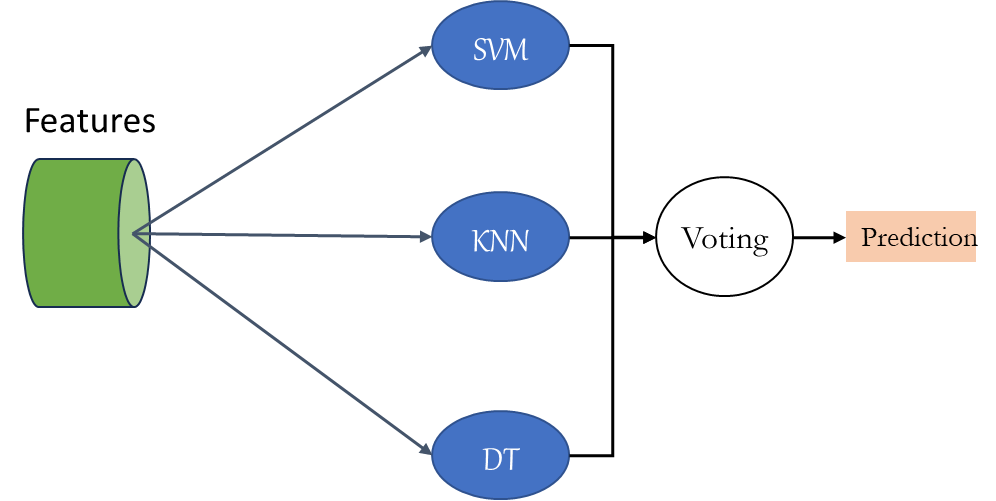

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model1 = svm.SVC(C=1, kernel='rbf')
model1.fit(X_train, y_train)
print("SVM Accuracy:", model1.score(X_test, y_test))


model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
print("KNN Accuracy:", model2.score(X_test, y_test))

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
print("DT Accuracy:", model3.score(X_test, y_test))

from sklearn.ensemble import VotingClassifier
# Créer le modèle de vote majoritaire avec nos 3 modèles SVM, KNN et DT
modelVoteMaj = VotingClassifier([ ('SVM', model1), ('KNN', model2),('DT', model3)])
modelVoteMaj.fit(X_train, y_train)
accuracy = modelVoteMaj.score(X_test, y_test)

print("Maj Voiting Accuracy:", accuracy)

SVM Accuracy: 0.9591836734693877
KNN Accuracy: 0.9591836734693877
DT Accuracy: 0.9489795918367347
Maj Voiting Accuracy: 0.9795918367346939


On peut constater d’après les valeurs des accuracy, que le vote majoritaire à pu dépasser de 1% les 3 modèles utilisés séparément.

<H4> Vote pondéré </h4>
La méthode de vote pondéré attribue des poids différents aux prédictions des modèles de base. Ces poids peuvent être attribués en fonction de la confiance ou de la performance estimée de chaque modèle.

Logiquement, dans cette méthode on accorde plus de poids aux prédictions des modèles qui sont considérés comme plus fiables.

La prédiction finale est la moyenne pondérée des prédictions de tous  les modèles de base.

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model1 = svm.SVC(C=1,kernel='rbf',probability = True) ## probability = True for  weighted (soft) classification
model1.fit(X_train, y_train)
print("SVM Accuracy:", model1.score(X_test, y_test))

model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
print("KNN Accuracy:", model2.score(X_test, y_test))

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
print("DT Accuracy:", model3.score(X_test, y_test))

from sklearn.ensemble import VotingClassifier
# Créer le modèle de vote pondéré avec nos 3 modèles SVM, KNN et DT
# voting='soft’ pour le vote pondéré
# weights=[0.4, 0.4, 0.2] pour respectivement les poids des 3 modèles SVM, KNN et DT.
modelVoteMaj = VotingClassifier([ ('SVM', model1), ('KNN', model2),('DT', model3)], voting='soft', weights=[0.4, 0.4, 0.2])

modelVoteMaj.fit(X_train, y_train)

accuracy = modelVoteMaj.score(X_test, y_test)
print("Weighted Voting Accuracy:", accuracy)

SVM Accuracy: 0.9591836734693877
KNN Accuracy: 0.9591836734693877
DT Accuracy: 0.9489795918367347
Weighted Voting Accuracy: 0.9693877551020408


On peut constater d’après les valeurs des accuracy, que le vote pondéré à pu aussi dépasser de 1% les 3 modèles utilisés séparément.

<H3>Bagging</H3>
Le Bagging (ou l’agrégation Bootstrap Aggregating) est une technique d'ensemble learning qui se base sur l'entraînement de plusieurs modèles de manière indépendante sur des sous-ensembles aléatoires de l'ensemble d'entraînement.

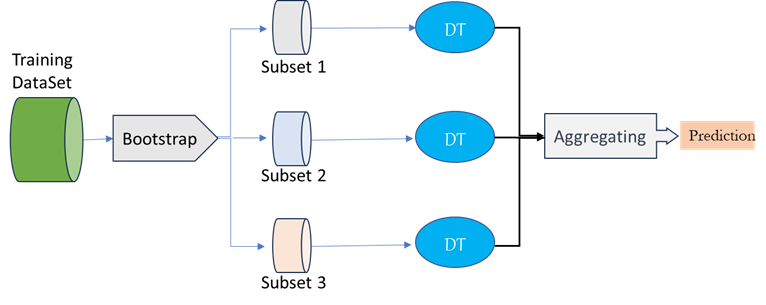

In [ ]:
from sklearn.ensemble import BaggingClassifier
# Créer le modèle de bagging avec 100 modèles à base du modèle DT
model = BaggingClassifier(estimator= DecisionTreeClassifier(), n_estimators=100)

model.fit(X_train, y_train)
accuracy =model.score(X_test, y_test)

print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.9897959183673469


<H3>Boosting</H3>
Le boosting est une technique où les modèles sont formés séquentiellement, chaque modèle corrigeant les erreurs du modèle précédent.

Les poids des exemples mal classés sont ajustés à chaque étape pour donner plus d'importance aux exemples difficiles. Les modèles sont ensuite pondérés dans la prédiction finale en fonction de leurs performances.

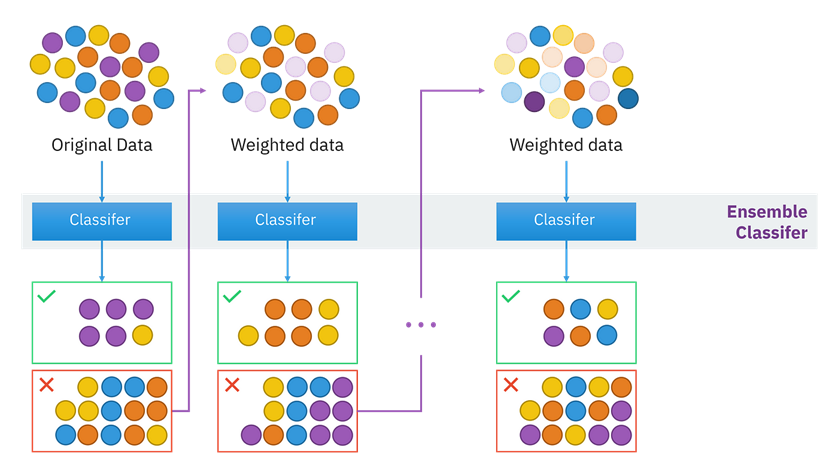

src: Pratyush Khare.
A Comprehensive Guide to Boosting Algorithms and Their Mathematical Foundations

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#max-dept=1 fpr stumps
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)

model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

print("Boosting Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting Accuracy: 0.9795918367346939


On remarque que le taux de classification de AdaBoost est nettement supérieur que les modèles de machine learning et surtout que le DT

<H3>Stacking</H3>
Le Stacking, également appelé Stacked Generalization, consiste en la combinaison les prédictions de plusieurs modèles de base en utilisant un modèle de niveau supérieur, souvent appelé "meta-modèle" ou "meta-classifier".

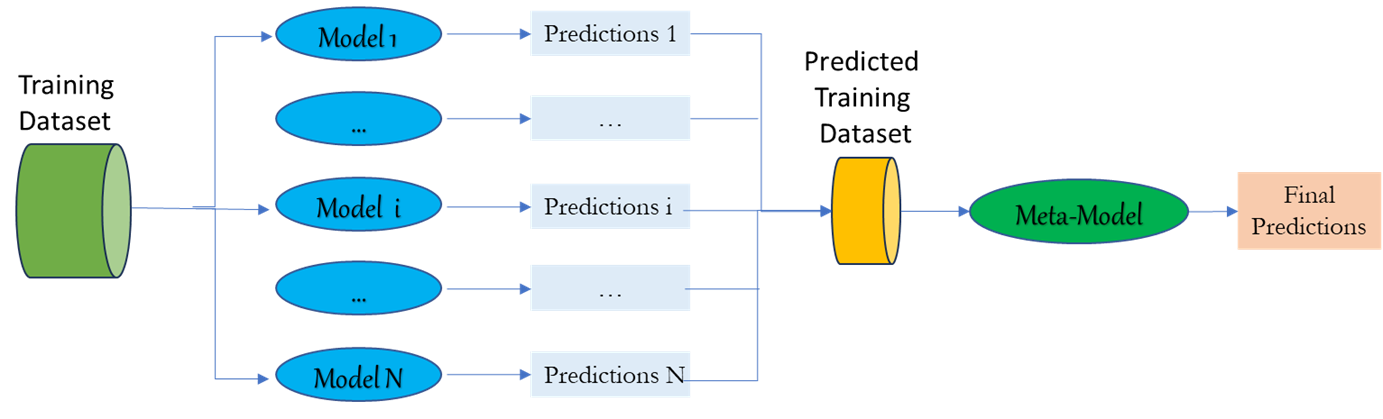

In [ ]:

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


model1 = svm.SVC(C=1,kernel='rbf')
model2= DecisionTreeClassifier()
model3 = KNeighborsClassifier(n_neighbors=3)

from sklearn.ensemble import StackingClassifier
# Créer le modèle de Stacking à base des 3 Modèles SVM, KNN et DT
# Le méta-modèle est la Régression logistique
model = StackingClassifier([('SVM', model1, 'Tree', model2),('KNN', model3)]
                           ,final_estimator=LogisticRegression())

model.fit(X_train, y_train)
accuracy= model.score(X_test, y_test)

print("Stacking Accuracy:", accuracy)


Stacking Accuracy: 0.9693877551020408


On remarque aussi que le stacking nous a permis d’améliorer le taux de classification que les algorithmes de ML SVM, KNN et DT.

<H2> Etude comparative </H1>
Pour l’implémentation afin d’évaluer l’impact de l’Ensemble Learning en comparaison avec les modèles séparément, le tableau ci-dessous résume les résultats de l'accuracy pour chaque implémentation.

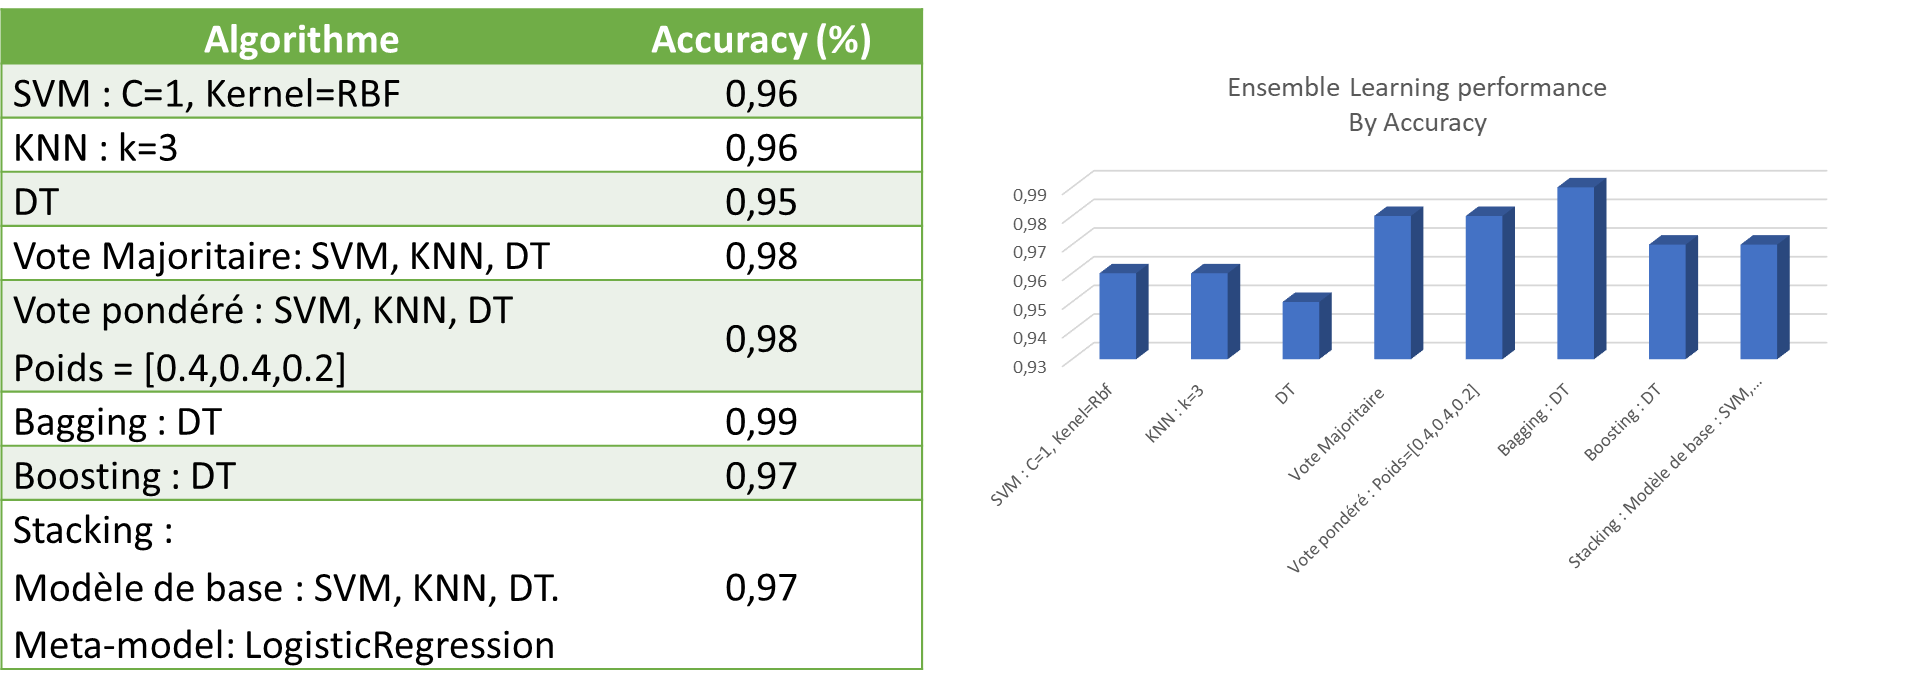